In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


plt.rcParams['figure.figsize'] = (8, 5)
sns.set_style("whitegrid")


In [2]:

df = pd.read_csv("BankChurners.csv")

df.head()


,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [3]:
df.shape

(10127, 23)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

In [6]:
df.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894,0.159997,0.840003
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691,0.365301,0.365301
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000,0.000008,0.000420
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000,0.000099,0.999660
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000,0.000181,0.999820
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000,0.000337,0.999900
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000,0.999580,0.999990


In [9]:
df.isnull().sum()

,0
CLIENTNUM,0
Attrition_Flag,0
Customer_Age,0
Gender,0
Dependent_count,0
Education_Level,0
Marital_Status,0
Income_Category,0
Card_Category,0
Months_on_book,0


In [10]:
df['Attrition_Flag'].value_counts()

,count
Attrition_Flag,
Existing Customer,8500
Attrited Customer,1627


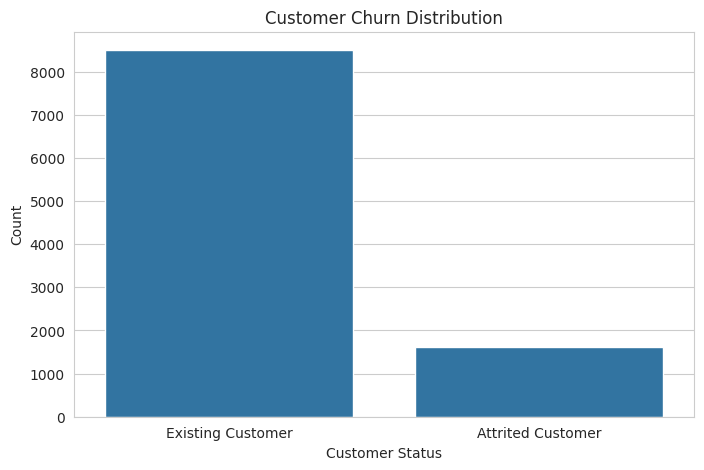

In [11]:
sns.countplot(x='Attrition_Flag', data=df)
plt.title("Customer Churn Distribution")
plt.xlabel("Customer Status")
plt.ylabel("Count")
plt.show()


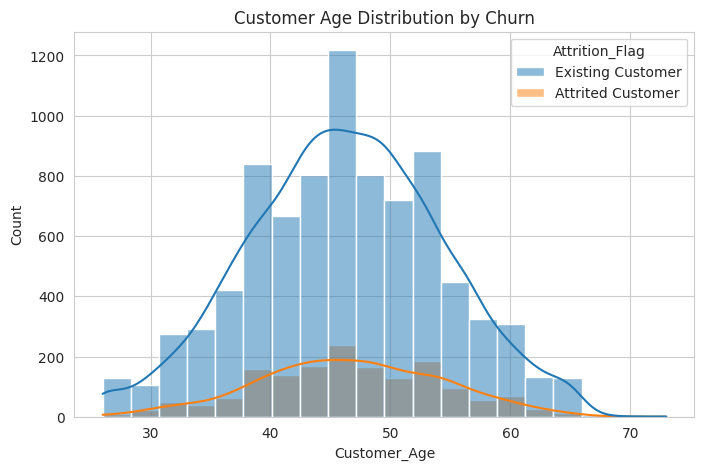

In [12]:
sns.histplot(data=df, x='Customer_Age', hue='Attrition_Flag', bins=20, kde=True)
plt.title("Customer Age Distribution by Churn")
plt.show()


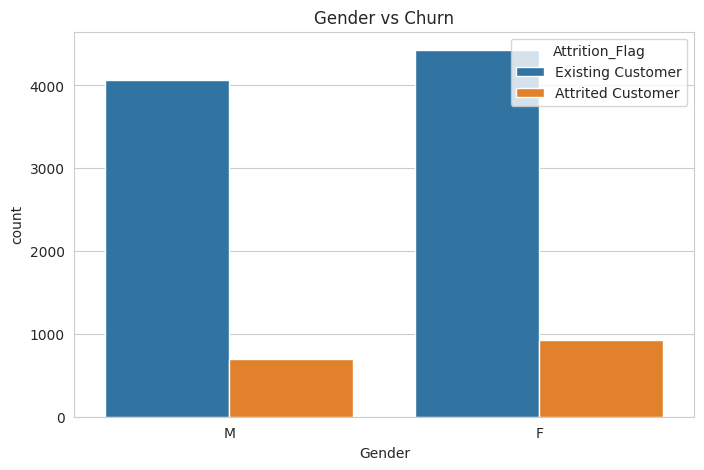

In [13]:
sns.countplot(x='Gender', hue='Attrition_Flag', data=df)
plt.title("Gender vs Churn")
plt.show()


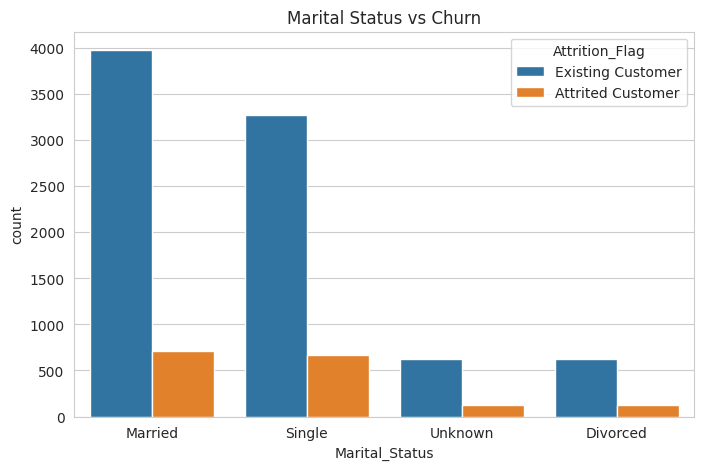

In [14]:
sns.countplot(x='Marital_Status', hue='Attrition_Flag', data=df)
plt.title("Marital Status vs Churn")
plt.show()


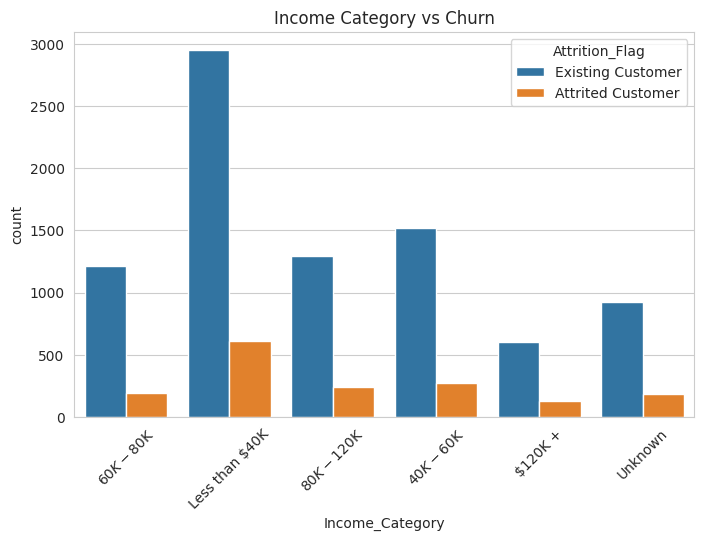

In [15]:
sns.countplot(x='Income_Category', hue='Attrition_Flag', data=df)
plt.xticks(rotation=45)
plt.title("Income Category vs Churn")
plt.show()


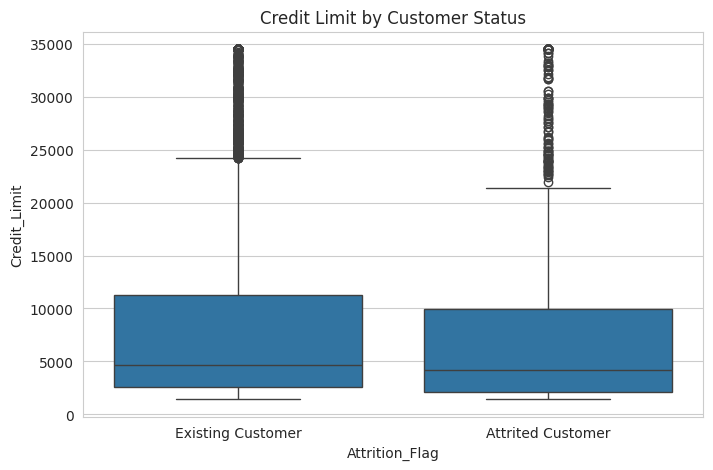

In [16]:
sns.boxplot(x='Attrition_Flag', y='Credit_Limit', data=df)
plt.title("Credit Limit by Customer Status")
plt.show()


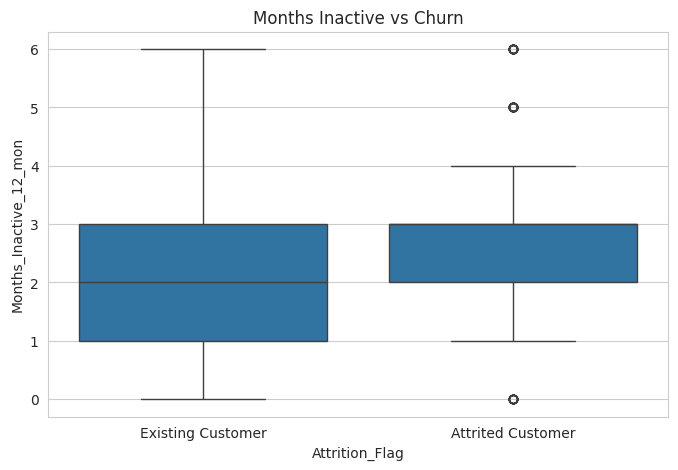

In [17]:
sns.boxplot(x='Attrition_Flag', y='Months_Inactive_12_mon', data=df)
plt.title("Months Inactive vs Churn")
plt.show()


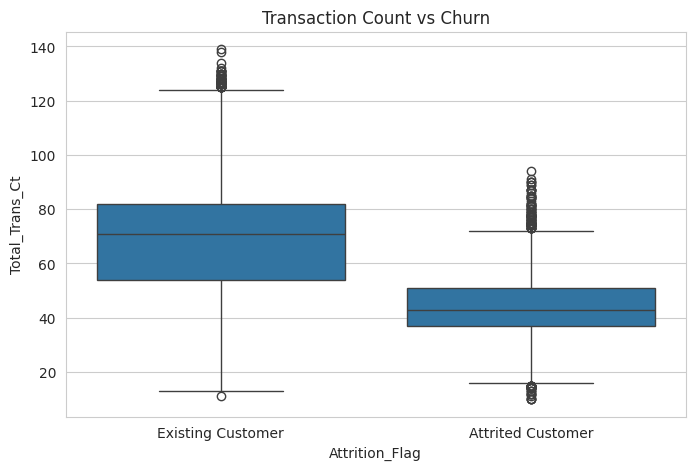

In [18]:
sns.boxplot(x='Attrition_Flag', y='Total_Trans_Ct', data=df)
plt.title("Transaction Count vs Churn")
plt.show()


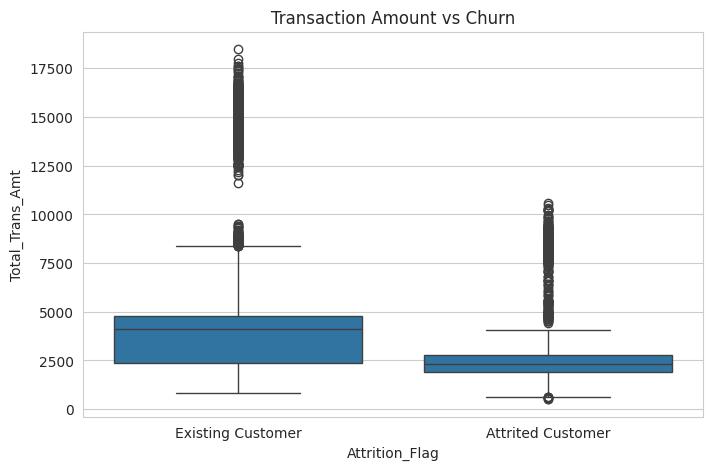

In [19]:
sns.boxplot(x='Attrition_Flag', y='Total_Trans_Amt', data=df)
plt.title("Transaction Amount vs Churn")
plt.show()


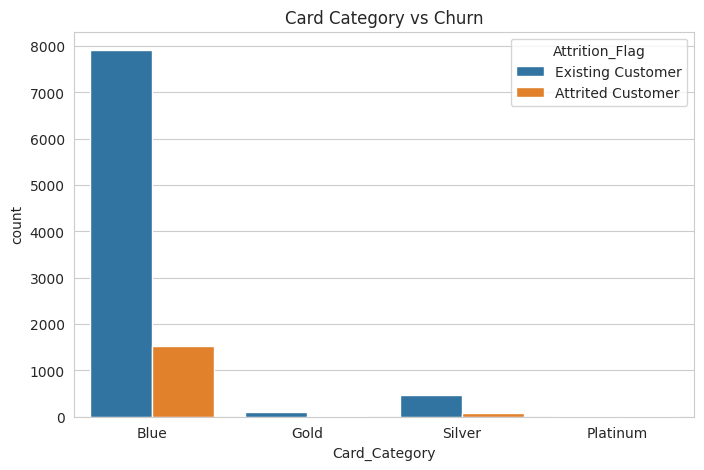

In [20]:
sns.countplot(x='Card_Category', hue='Attrition_Flag', data=df)
plt.title("Card Category vs Churn")
plt.show()


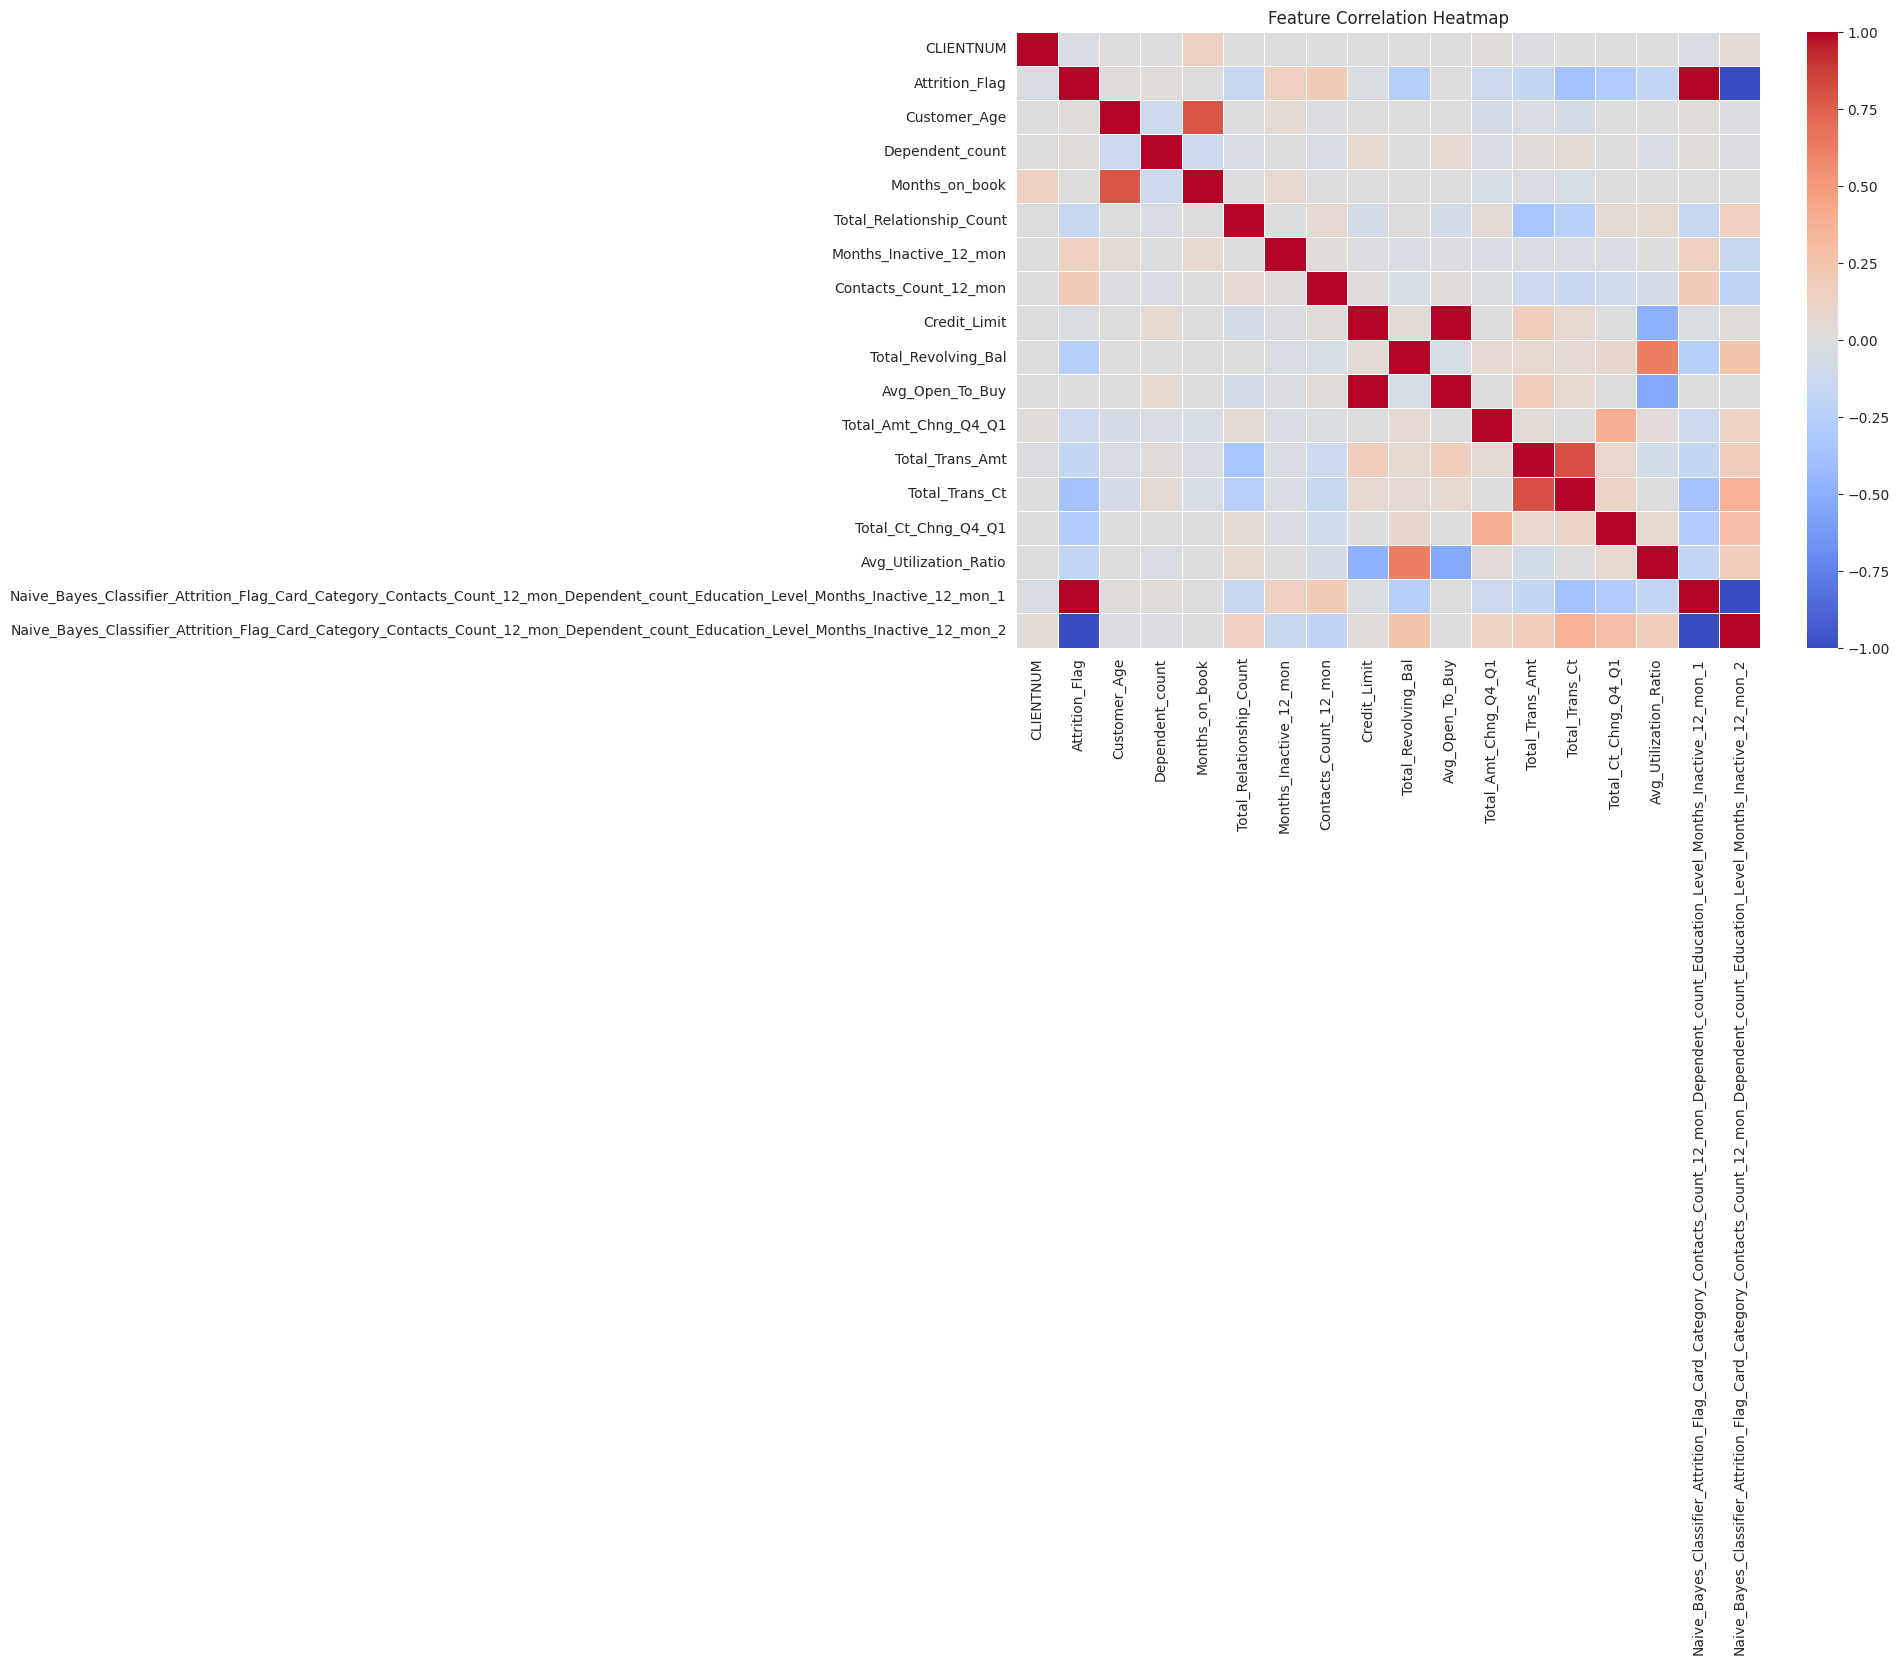

In [21]:
# Encode target variable for correlation
df_corr = df.copy()
df_corr['Attrition_Flag'] = df_corr['Attrition_Flag'].map({
    'Existing Customer': 0,
    'Attrited Customer': 1
})

# Select numeric columns
numeric_df = df_corr.select_dtypes(include=np.number)

# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), cmap='coolwarm', linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


EDA Key Findings:
- Customer churn is driven primarily by engagement and transaction behavior.
- Higher inactivity and lower transaction frequency strongly correlate with churn.
- Demographics play a minor role compared to behavioral signals.